# Introducción a Seaborn

## Acerca de los datos
En este NoteBook, trabajaremos con 2 conjuntos de datos:
- La cotización de las acciones de Facebook a lo largo de 2018 (obtenida utilizando el[`stock_analysis` package](https://github.com/stefmolin/stock-analysis))
- Datos sísmicos del 18 de septiembre de 2018 al 13 de octubre de 2018 (obtenidos del Servicio Geológico de Estados Unidos (USGS) mediante el programa[USGS API](https://earthquake.usgs.gov/fdsnws/event/1/))

## Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('data/earthquakes.csv')

## Datos categóricos
Un [terremoto de magnitud 7,5 el 28 de septiembre de 2018 cerca de Palu, Indonesia, causó después un tsunami devastador](https://www.livescience.com/63721-tsunami-earthquake-indonesia.html). Echemos un vistazo a algunas visualizaciones para entender qué técnicas de magnitud (`magType`) se utilizan en Indonesia, el rango de magnitudes allí, y cuántos de los terremotos van acompañados de un tsunami.

In [2]:
quakes.assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms')
).set_index('time').loc['2018-09-28'].query(
    'parsed_place == "Indonesia" and tsunami and mag == 7.5'
)

,mag,magType,place,tsunami,parsed_place
time,,,,,
2018-09-28 10:02:43.480,7.5,mww,"78km N of Palu, Indonesia",1,Indonesia


### `stripplot()`
La función `stripplot()` nos ayuda a visualizar datos categóricos en un eje y datos numéricos en el otro. Ahora también tenemos la opción de colorear nuestros puntos utilizando una columna de nuestros datos (con el parámetro `hue`). Utilizando un gráfico de bandas, podemos ver los puntos de cada terremoto que se midió con un `magType` determinado y cuál fue su magnitud; sin embargo, no es demasiado fácil ver la densidad de los puntos debido al solapamiento:

<Axes: xlabel='magType', ylabel='mag'>

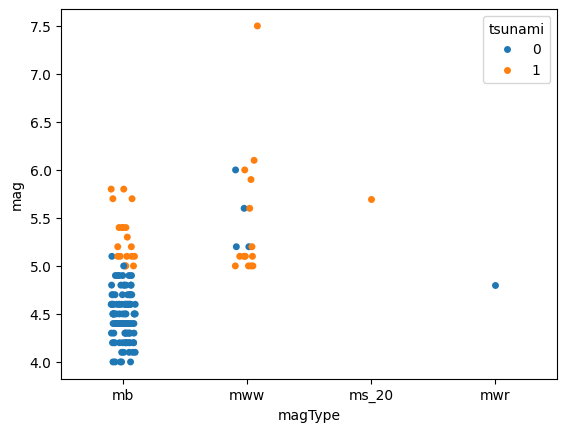

In [3]:
sns.stripplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data=quakes.query('parsed_place == "Indonesia"')
)

### `swarmplot()`
El gráfico de enjambre de abejas ayuda a resolver este problema evitando que los puntos se solapen. Observa cuántos puntos más podemos ver para la sección azul de la columna `mb`:

<Axes: xlabel='magType', ylabel='mag'>

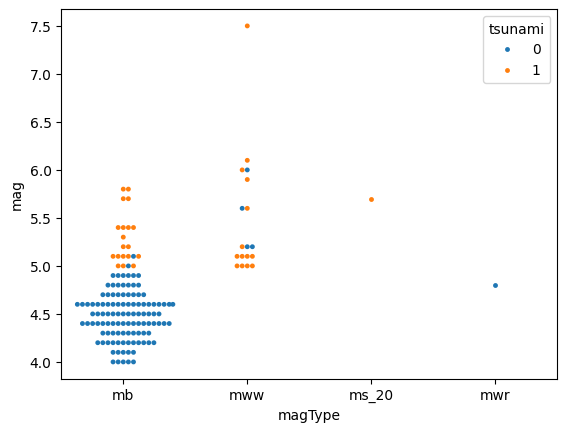

In [4]:
sns.swarmplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data=quakes.query('parsed_place == "Indonesia"'),
    size=3.5 # point size
)

### `boxenplot()`
La función `boxenplot()` crea un gráfico de caja mejorado que muestra cuantiles adicionales:

Text(0.5, 1.0, 'Comparación de la magnitud de los terremotos por magType')

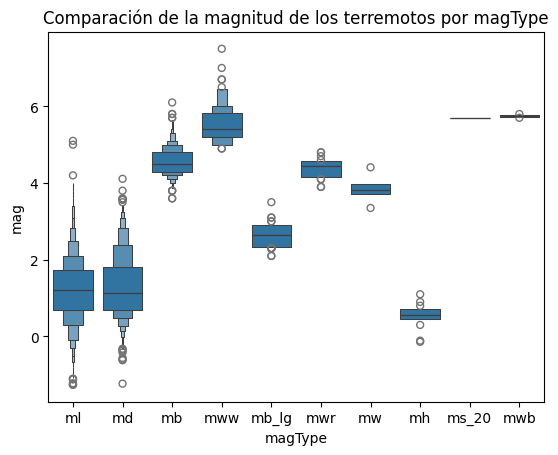

In [5]:
sns.boxenplot(
    x='magType', y='mag', data=quakes[['magType', 'mag']]
)
plt.title('Comparación de la magnitud de los terremotos por magType')

*Más información sobre este tipo de parcela en este documento: [Letter-value plots: Boxplots for large data](https://vita.had.co.nz/papers/letter-value-plot.html)*

### `violinplot()`
Los diagramas de violín combinan diagramas de caja y KDE:

C:\Users\Sandia\AppData\Local\Temp\ipykernel_23476\3048876868.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Text(0.5, 1.0, 'Comparación de la magnitud de los terremotos por magType')

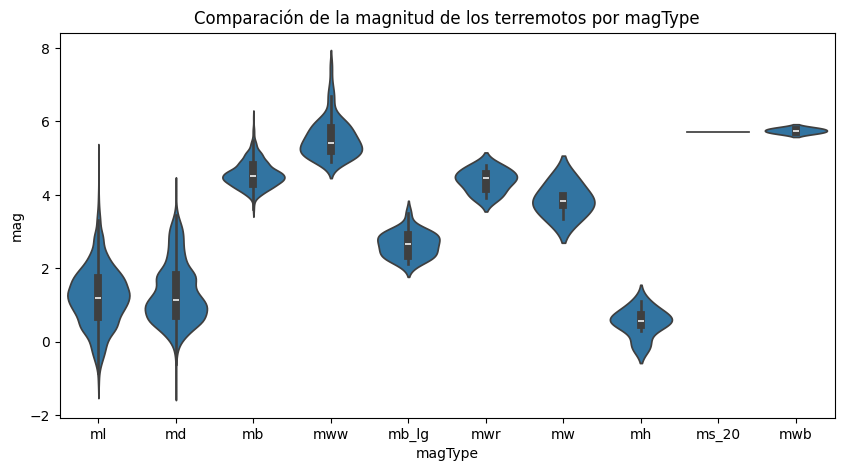

In [6]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.violinplot(
    x='magType', y='mag', data=quakes[['magType', 'mag']],  
    ax=axes, scale='width' # all violins have same width
)
plt.title('Comparación de la magnitud de los terremotos por magType')

## Correlaciones y Heatmap

### `heatmap()`
En el capítulo anterior vimos cómo crear un mapa de calor de matrices de correlación utilizando `pandas` y `matplotlib`. Una forma más sencilla es utilizar `seaborn`:

<Axes: >

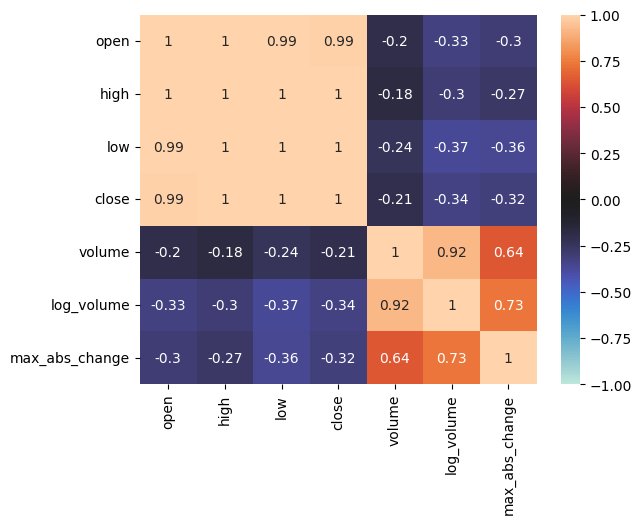

In [7]:
sns.heatmap(
    fb.sort_index().assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    ).corr(),
    annot=True, center=0, vmin=-1, vmax=1
)

### `pairplot()`
El pairplot es la respuesta de seaborn a la matriz de dispersión que vimos en el capítulo 5 (`pandas.plotting.scatter_matrix()`):

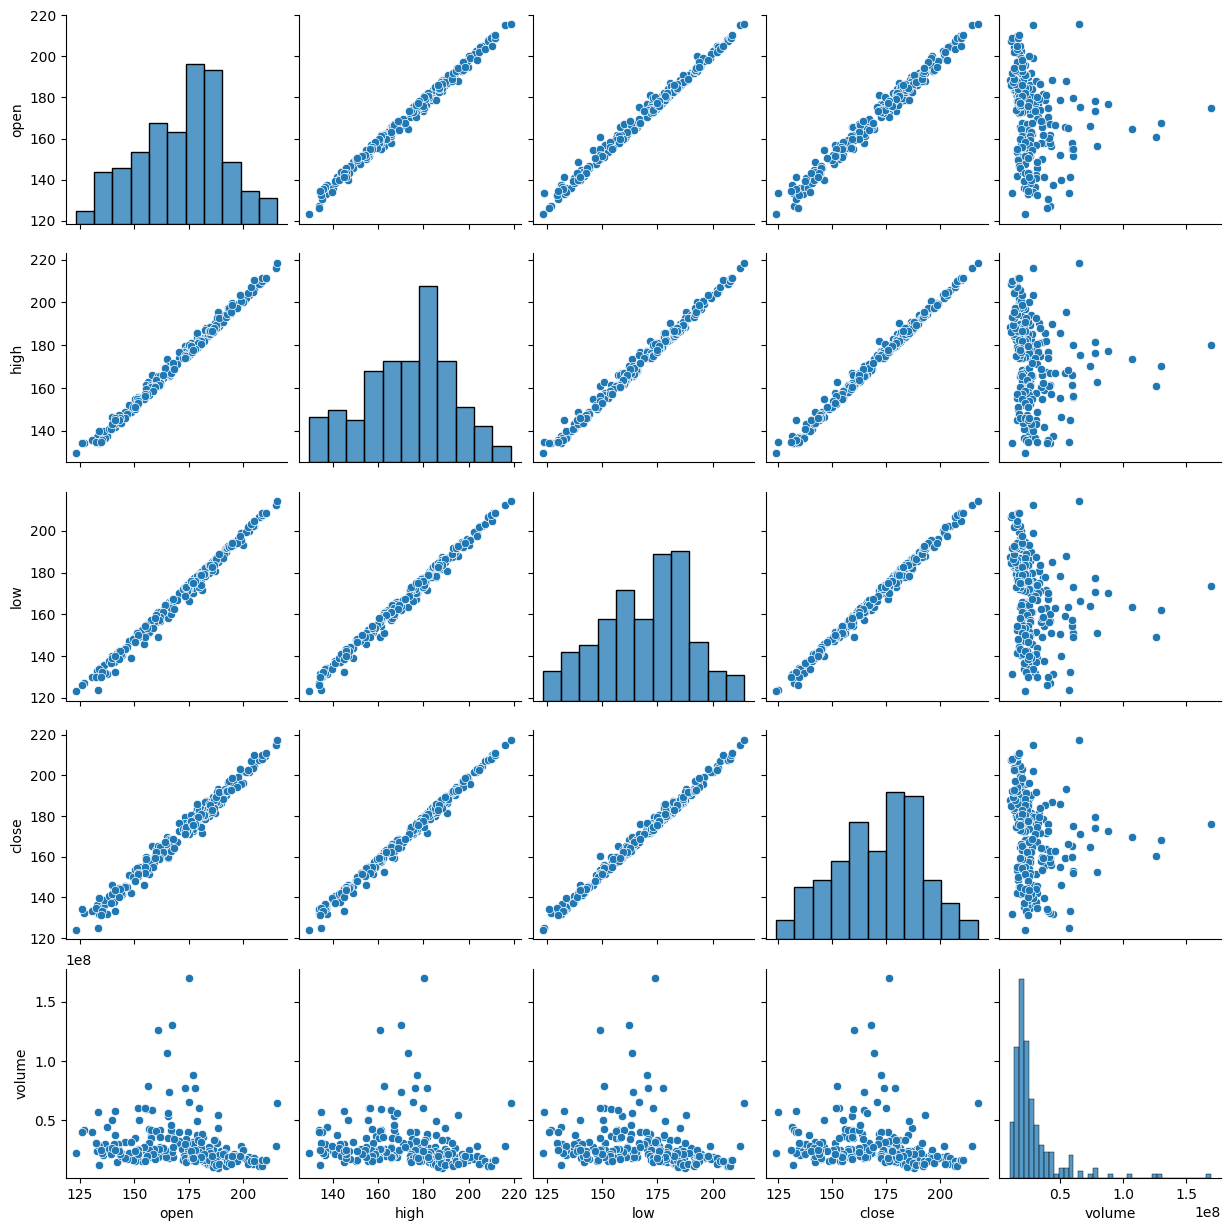

In [8]:
sns.pairplot(fb)

Al igual que con `pandas` podemos especificar qué mostrar a lo largo de la diagonal; sin embargo, `seaborn` también nos permite colorear los datos basándonos en otra columna (u otros datos con la misma forma):

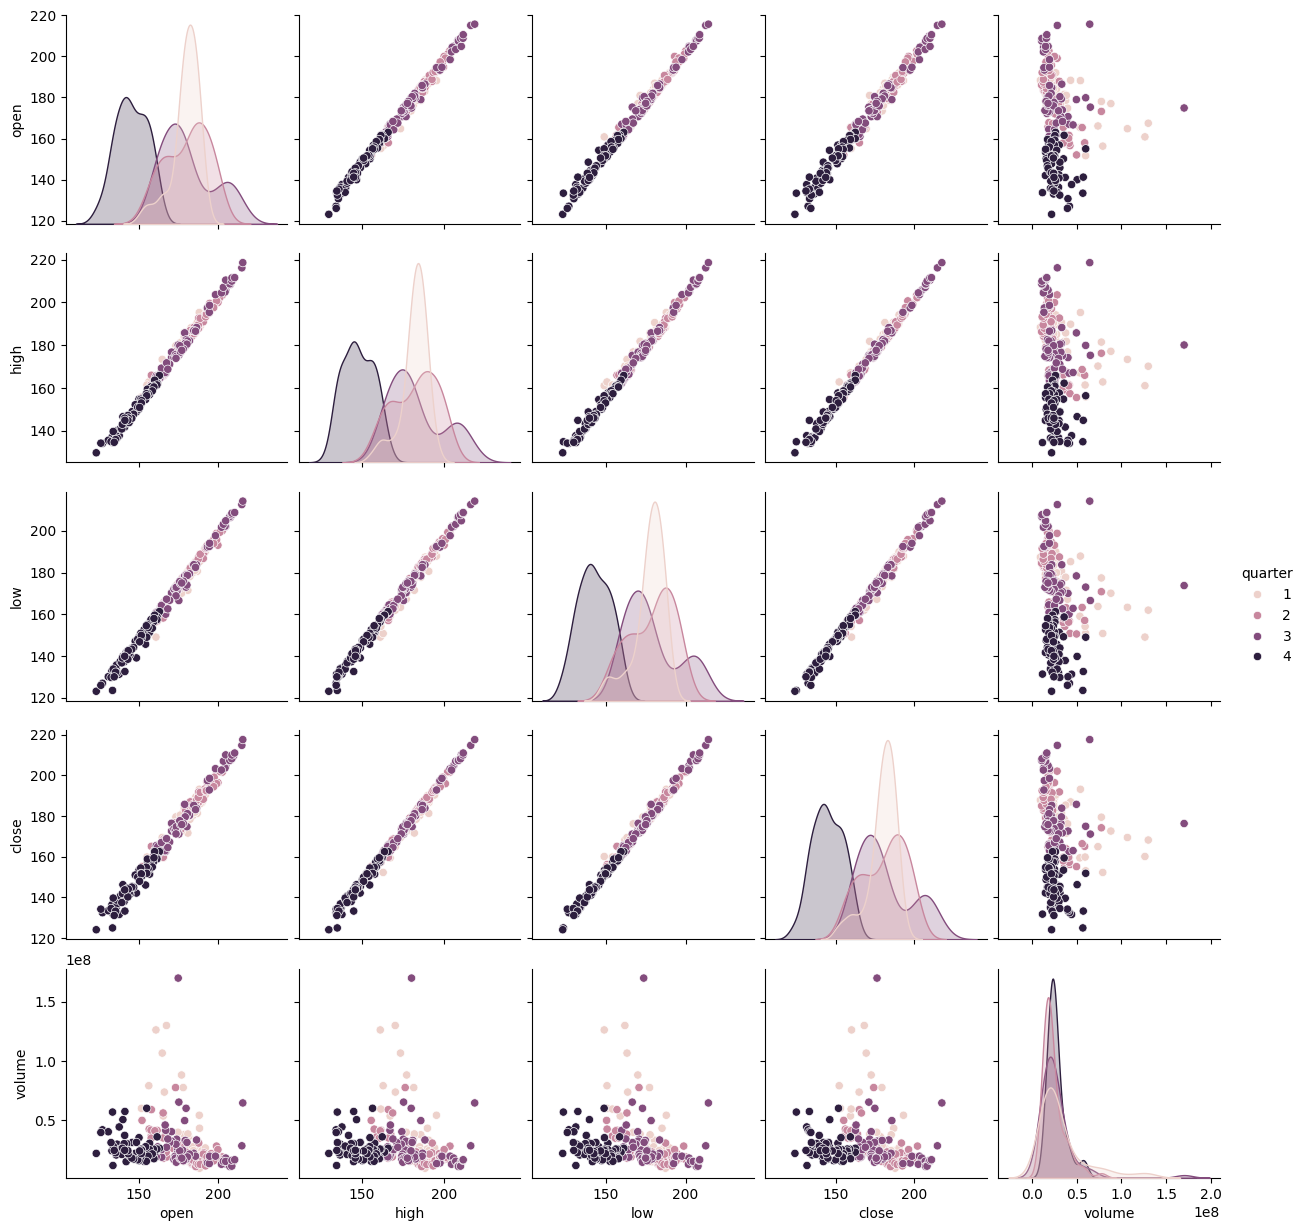

In [9]:
sns.pairplot(
    fb.assign(quarter=lambda x: x.index.quarter),
    diag_kind='kde',
    hue='quarter'
)

### `jointplot()`
El jointplot nos permite visualizar la relación entre dos variables, como un gráfico de dispersión. Sin embargo, obtenemos el beneficio añadido de poder visualizar sus distribuciones al mismo tiempo (como un histograma o KDE). Las opciones por defecto nos dan un gráfico de dispersión en el centro e histogramas a los lados:

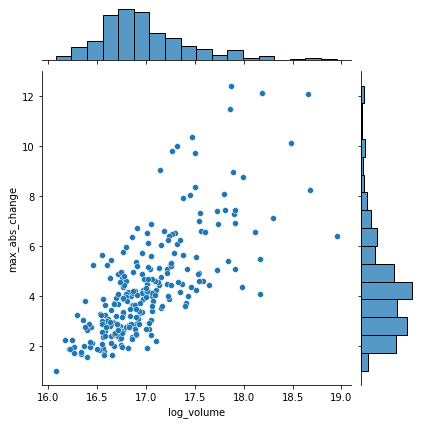

In [10]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

Podemos pasar `kind='hex'` para hexbins:

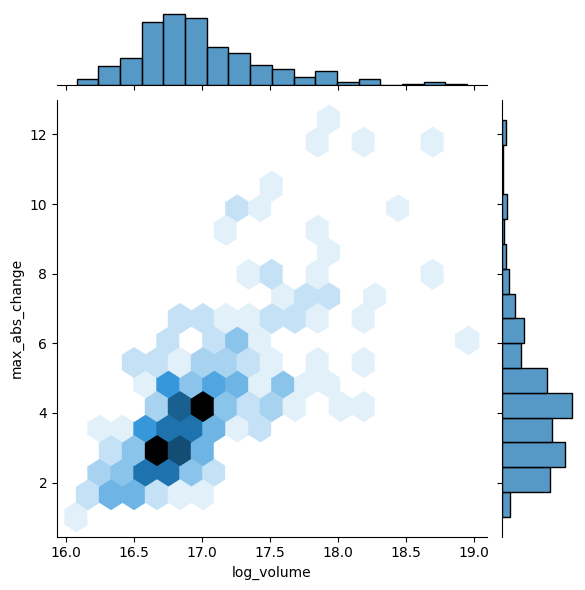

In [10]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='hex',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

Si pasamos `kind='kde'`, obtendremos un gráfico de contorno de la estimación de la densidad conjunta con KDEs a los lados:

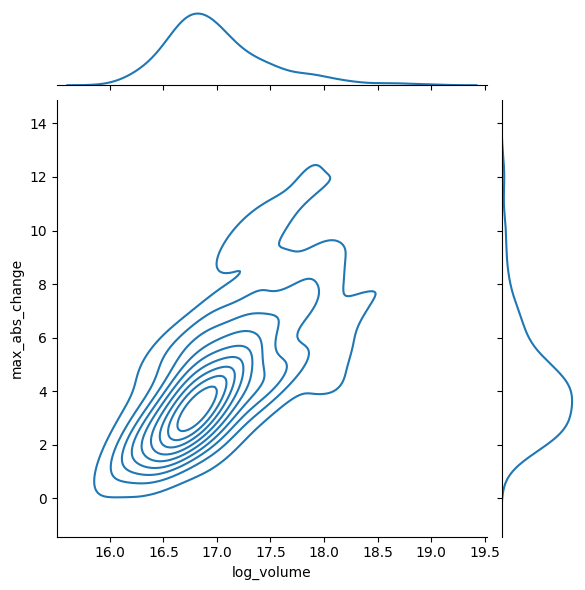

In [11]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='kde',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

Si especificamos `kind='reg'` en su lugar, obtendremos una línea de regresión en el centro y KDEs a los lados:

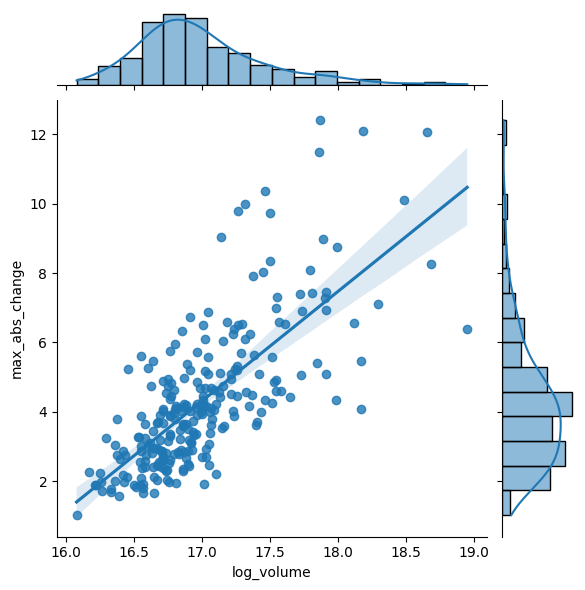

In [12]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='reg',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

Si pasamos `kind='resid'`, obtendremos los residuos de la regresión mencionada:

Text(37.722222222222214, 0.5, 'residuals')

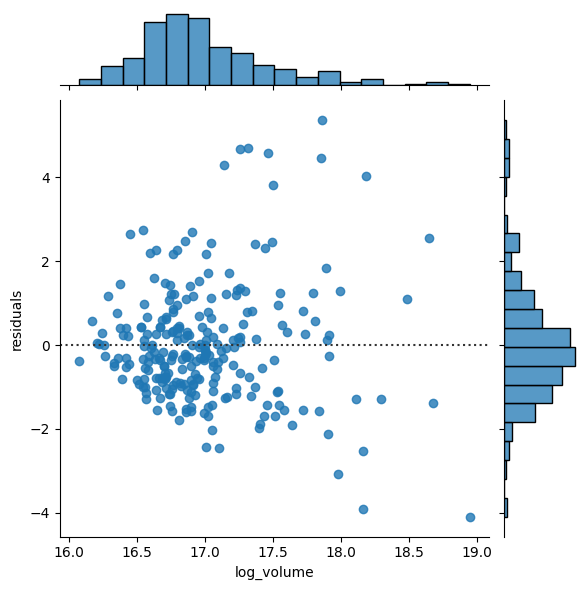

In [13]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='resid',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)
# actualizar la etiqueta del eje y (discutido en el siguiente cuaderno)
plt.ylabel('residuals')

## Gráficos de regresión
Vamos a utilizar `seaborn` para visualizar una regresión lineal entre el logaritmo del volumen negociado en acciones de Facebook y el cambio diario absoluto máximo (precio máximo diario de las acciones - precio mínimo diario de las acciones). Para ello, primero tenemos que aislar estos datos:

In [14]:
fb_reg_data = fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).iloc[:,-2:]

Puesto que queremos visualizar cada columna como regresor, tenemos que buscar permutaciones de su orden. Las permutaciones y combinaciones (entre otras cosas) se facilitan en Python con `itertools`, así que vamos a importarlo:

In [16]:
import itertools

`itertools` nos proporciona iteradores eficientes. Los iteradores son objetos sobre los que hacemos bucles, agotándolos. Este es un iterador de `itertools`; observa cómo el segundo bucle no hace nada:

In [17]:
iterator = itertools.repeat("I'm an iterator", 1)

for i in iterator:
    print(f'-->{i}')
print('This printed once because the iterator has been exhausted')
for i in iterator:
    print(f'-->{i}')

-->I'm an iterator
This printed once because the iterator has been exhausted


Los iterables son objetos sobre los que se puede iterar. Al entrar en un bucle, se crea un iterador a partir del iterable para manejar la iteración. Los iteradores son iterables, pero no todos los iterables son iterables. Una lista es un iterable. Si convertimos ese iterador en un iterable (una lista en este caso), se ejecuta el segundo bucle:

In [18]:
iterable = list(itertools.repeat("I'm an iterable", 1))

for i in iterable:
    print(f'-->{i}')
print('This prints again because it\'s an iterable:')
for i in iterable:
    print(f'-->{i}')

-->I'm an iterable
This prints again because it's an iterable:
-->I'm an iterable


La función `reg_resid_plots()` del módulo `viz.py` en esta carpeta utiliza `regplot()` y `residplot()` de seaborn junto con `itertools` para trazar la regresión y los residuos lado a lado:

In [19]:
from viz import reg_resid_plots
reg_resid_plots??

Signature: reg_resid_plots(data)
Source:   
def reg_resid_plots(data):
    """
    Usando `seaborn`, traza los gráficos de regresión y residuos
    lado a lado para cada permutación de 2 columnas en los datos.
    
    Parámetros:
        - Datos: Un `pandas.DataFrame`.

    Devuelve:
        Un objeto `Axes` de matplotlib.
    """
    num_cols = data.shape[1]
    permutation_count = num_cols * (num_cols - 1)

    fig, ax = plt.subplots(permutation_count, 2, figsize=(15, 8))

    for (x, y), axes, color in zip(
        itertools.permutations(data.columns, 2), 
        ax,
        itertools.cycle(['royalblue', 'darkorange'])
    ):
        for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
            func(x=x, y=y, data=data, ax=subplot, color=color)

            if func == sns.residplot:
                # marcar los residuos como tales
                subplot.set_ylabel('residuals')
    return fig.axes
File:      c:\users\sandia\documents\ds_pt_09_2023\data_analysis\analisi

Let's see what the output looks like for the Facebook data we isolated:

[<Axes: xlabel='log_volume', ylabel='max_abs_change'>,
 <Axes: xlabel='log_volume', ylabel='residuals'>,
 <Axes: xlabel='max_abs_change', ylabel='log_volume'>,
 <Axes: xlabel='max_abs_change', ylabel='residuals'>]

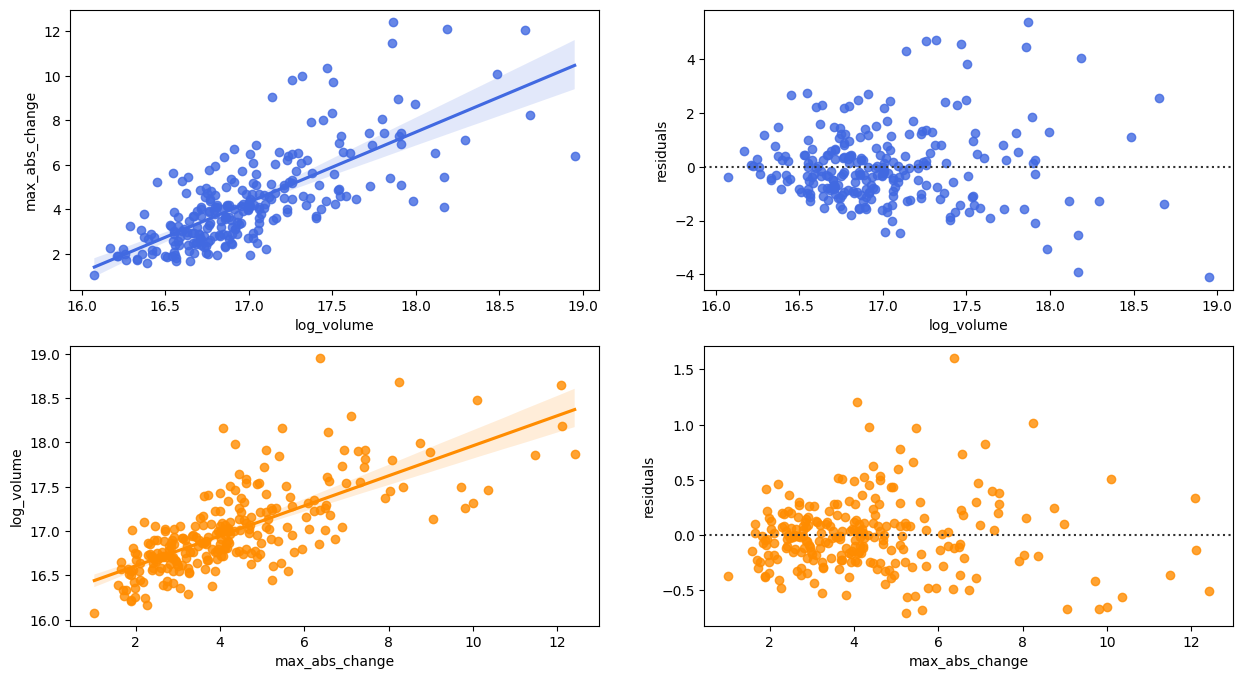

In [20]:
from viz import reg_resid_plots
reg_resid_plots(fb_reg_data)

Podemos utilizar `lmplot()` para dividir nuestra regresión en subconjuntos de nuestros datos. Por ejemplo, podemos realizar una regresión por trimestre en los datos de acciones de Facebook:

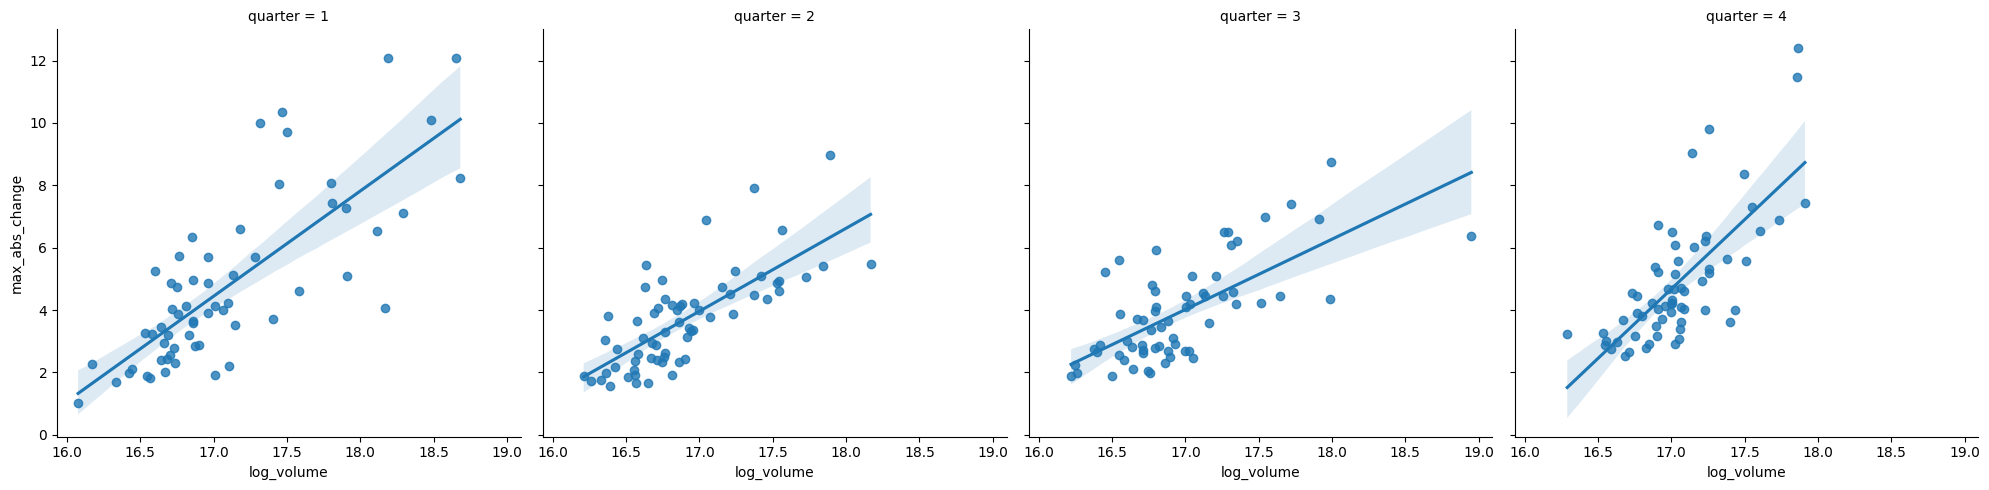

In [21]:
sns.lmplot(
    x='log_volume',
    y='max_abs_change',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low,
        quarter=lambda x: x.index.quarter
    ),
    col='quarter'
)

## Faceting
Podemos crear subparcelas a través de subconjuntos de nuestros datos por facetado. En primer lugar, creamos una `FacetGrid` especificando cómo distribuir los gráficos (qué columna categórica va a lo largo de las filas y cuál a lo largo de las columnas). A continuación, llamamos al método `map()` de la `FacetGrid` y le pasamos la función de trazado que queremos utilizar (junto con cualquier argumento adicional).

Utilicemos una cuadrícula de facetas para mostrar la distribución de las magnitudes de los terremotos en Indonesia y Papúa Nueva Guinea por `tsunami` y `parsed_place`:

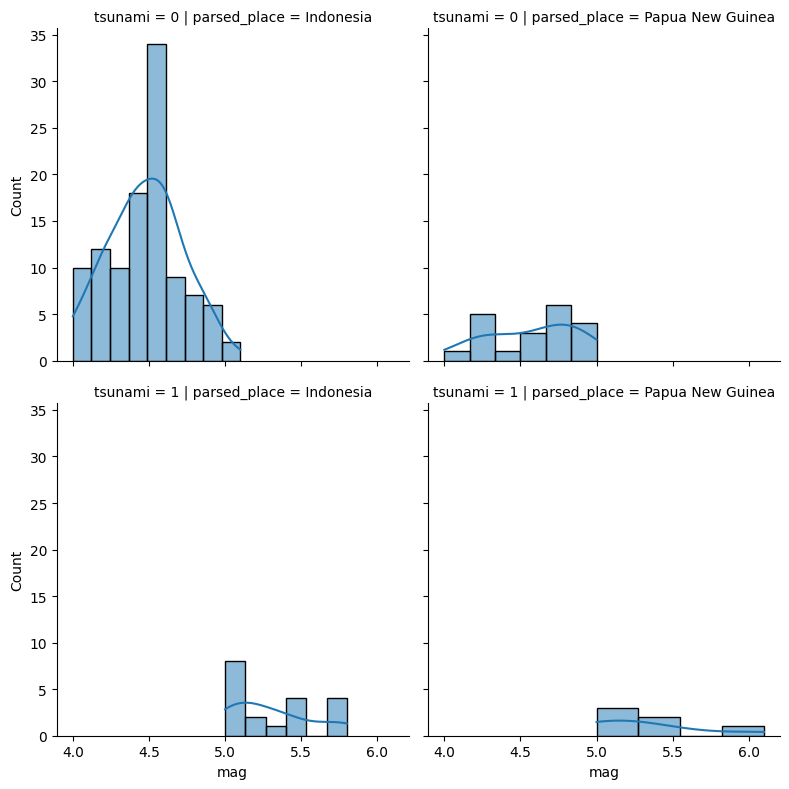

In [22]:
g = sns.FacetGrid(
    quakes.query(
        'parsed_place.isin(["Indonesia", "Papua New Guinea"]) '
        'and magType == "mb"'
    ),
    row='tsunami',
    col='parsed_place',
    height=4
)
g = g.map(sns.histplot, 'mag', kde=True)

<hr>
<div>
    <a href="../ch_05/3-modulo_pandas_plot.ipynb">
        <button>&#8592; Capitulo 5</button>
    </a>
    <a href="./2-formateando_plots.ipynb">
        <button style="float: right;">Proximo Notebook &#8594;</button>
    </a>
</div>
<hr>